In [68]:
#importing libraries that have functions we will use
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
import string
#plt.rcParams.update({'font.size': 8})


sns.set()
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

In [3]:
df = pd.ExcelFile('/Users/stephaniepeng/Desktop/BIMI_Carl_Jupyter/Health Clinics CA SoCal.xlsx') #reading excel file
df = df.parse('Health Clinics CA Master Sheet') #selecting the sheet of the excel file to use
df = df.fillna("") #filling na's with blanks

df = df[df['Exclude from Interactive Map'] == 'Include'] #filtering rows for "Included" clinics
df


,Health Center Site Fact Identification Number,Health Center Site Fact Identification Number.1,Exclude from Interactive Map,Site Name Uniform,UDS Number,Site Telephone Number,Site Web Address,Site Web Address Supplemented,Clinic Site Web Address,Operating Hours per Week,...,Language Support Screenshot,Capacity Hours of Operation per Week,Capacity Hours of Operation per Week Screenshot,Sameday Appointment or Walk in,Sameday Appointment or Walk in Screenshot,Late Hours or Weekend Appointment,Late Hours or Weekend Appointment Screenshot,Notes,Coder,Covid Testing
4,12160,Del Norte Community Health Center,Include,Del Norte Community Health Center,09154B,707-465-6925 x6229,www.opendoorhealth.com,,https://opendoorhealth.com/locations/del-norte...,64,...,,69,https://drive.google.com/file/d/1QuZuPQZoOGm7L...,Same-day,https://drive.google.com/file/d/1yXfauzV_iEelB...,Both,https://drive.google.com/file/d/1yXfauzV_iEelB...,,Luna Kohut,
7,7235,EL DORADO COUNTY COMMUNITY HEALTH CENTER,Include,El Dorado Community Health Center,0923660,530-621-7700,www.edcchc.org,,,46,...,https://drive.google.com/file/d/1EUBC8gTY1DHeV...,50,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Same-day,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Neither,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Same day appointments are only available to cu...,Jaqueline Perez Verdin,
8,7751,El Dorado County Community Health Center,Include,El Dorado Community Health Center,,530-621-7700,www.edcchc.org,,,55,...,https://drive.google.com/file/d/1EUBC8gTY1DHeV...,50,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Same-day,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Neither,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Same day appointments are only available to cu...,Jaqueline Perez Verdin,
9,11079,El Dorado Community Health Center Cameron Park...,Include,El Dorado Community Health Center,,530-621-7700,www.edcchc.org,,,64,...,https://drive.google.com/file/d/1EUBC8gTY1DHeV...,64,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Same-day,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Neither,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Same day appointments are only available to cu...,Jaqueline Perez Verdin,
11,13289,Cameron Park Health Center,Include,El Dorado Community Health Center,,530-621-7700,www.edcchc.org,,,50,...,https://drive.google.com/file/d/1EUBC8gTY1DHeV...,64,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Same-day,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Neither,https://drive.google.com/file/d/1q7X78iZ9JJ-6P...,Same day appointments are only available to cu...,Jaqueline Perez Verdin,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,12432,Clinicas Del Camino Real Inc - Santa Paula,Include,,,,www.clinicas.org,,https://clinicas.org/content/santa-paula,46,...,https://drive.google.com/file/d/1NNskExiSR6eP4...,47.5,https://drive.google.com/file/d/1M9TvJ3_AmwNVV...,No Information,,Neither,,This clinic is part of the Clinicas network in...,Luis Gallardo,No Information
1063,13609,"Clinicas del Camino Real, Inc. - East Simi Valley",Include,,,805-659-1740,email@clinicas.org,,https://clinicas.org/content/east-simi-valley,40,...,https://drive.google.com/file/d/1NNskExiSR6eP4...,47.5,https://drive.google.com/file/d/19_-sNqSreS9VM...,No Information,,Neither,,This clinic is part of the Clinicas network in...,Luis Gallardo,No Information
1067,13806,"Clinicas del Camino Real, Inc., El Rio",Include,,,805-436-3444,www.clinicas.org,,https://clinicas.org/content/el-rio,46,...,https://drive.google.com/file/d/1NNskExiSR6eP4...,47.5,https://drive.google.com/file/d/16DfK8olVBnlaU...,No Information,,Neither,,This clinic is part of the Clinicas network in...,Luis Gallardo,No Information
1069,14293,CLINICAS DEL CAMINO REAL,Include,Clinicas del Camino Real,093650,805-659-1740,www.clinicas.org,,,40,...,,,,,,,,This clinic has the same address as three mobi...,Luis Gallardo,No Information


In [4]:
#addresses = df["Address Clean"] #pulling out address column
#cities = [re.findall(r", (.*), C[a,A] [0-9]*", address) for address in addresses] #loop pulling out the city names
## Manually inputting empty strings: 76, 88, 108 - Carl just fixed the adresses in the xlsx sheet instead
#cities[76] = ["San Francisco"]
#cities[85] = ["San Rafael"]
#cities[88] = ["Napa"]
#cities[108] = ["Santa Rosa"]

df['Site City'] = df['Site City'].str.lower() #making the city names lowercase
cities = df["Site City"] #naming this list of cities as a new object, "cities"

In [5]:
city_names ,city_counts = np.unique(cities, return_counts=True) #counting the number of times each city occurs

#creating new dataframe with unique city name and the # of occurrences (aka # of clinics)
bimi_city_df = pd.DataFrame({"City Name" : city_names, "Count" : city_counts}).sort_values(by="Count")
bimi_city_df = bimi_city_df.set_index("City Name")
bimi_city_df

,Count
City Name,
menifee,1
nuevo,1
ojai,1
pauma valley,1
penn valley,1
...,...
escondido,13
oxnard,13
long beach,22


In [45]:
census_df = pd.read_csv('/Users/stephaniepeng/Desktop/BIMI_Carl_Jupyter/acs_clean')
census_df = census_df.fillna("")

#reading in census data

census_df

,Place,State,City_Clean,Total Population,Native Born Population,Foreign-Born Population,Native Born Uninsured,Foreign-Born Uninsured
0,Apache Junction city,Arizona,apache junction,40504,37882,2622,2870,258
1,Avondale city,Arizona,avondale,84315,70597,13718,6258,2353
2,Benson city,Arizona,benson,4829,4756,73,253,11
3,Bisbee city,Arizona,bisbee,4943,4486,457,569,81
4,Buckeye city,Arizona,buckeye,63138,56288,6850,3759,943
...,...,...,...,...,...,...,...,...
568,Yountville city,California,yountville,2542,2231,311,34,5
569,Yreka city,California,yreka,7542,7369,173,313,5
570,Yuba City city,California,yuba,65232,48813,16419,2832,2265
571,Yucaipa city,California,yucaipa,53001,47108,5893,2092,696


In [46]:
census_df['Health Clinic Count'] = 0
for city in census_df["City_Clean"]:
    if any(bimi_city_df.index == city):
        census_df.loc[census_df['City_Clean'] == city, 'Health Clinic Count'] = bimi_city_df['Count'][city]
census_df
#pd.set_option('display.max_rows', 500)
#merging with health clinic data

,Place,State,City_Clean,Total Population,Native Born Population,Foreign-Born Population,Native Born Uninsured,Foreign-Born Uninsured,Health Clinic Count
0,Apache Junction city,Arizona,apache junction,40504,37882,2622,2870,258,0
1,Avondale city,Arizona,avondale,84315,70597,13718,6258,2353,0
2,Benson city,Arizona,benson,4829,4756,73,253,11,0
3,Bisbee city,Arizona,bisbee,4943,4486,457,569,81,0
4,Buckeye city,Arizona,buckeye,63138,56288,6850,3759,943,0
...,...,...,...,...,...,...,...,...,...
568,Yountville city,California,yountville,2542,2231,311,34,5,0
569,Yreka city,California,yreka,7542,7369,173,313,5,0
570,Yuba City city,California,yuba,65232,48813,16419,2832,2265,0
571,Yucaipa city,California,yucaipa,53001,47108,5893,2092,696,0


In [8]:
#census_df['Foreign-Born Uninsured'] = pd.to_numeric(census_df['Estimate!!Total!!Foreign born!!Below 100 percent of the poverty level'])\
#                                       + pd.to_numeric(census_df['Estimate!!Total!!Foreign born!!100 to 149 percent of the poverty level'])
#cleaning census variable

In [9]:
#census_df = census_df[['id',
#                     "Geographic Area Name",
#                     'Low Income Foreign-Born',
#                     'City Cleaned',
#                     'Legal Service Count']]
#census_df = census_df.rename(columns={"Geographic Area Name":'Geography'})
#merging

In [47]:
pd.set_option('display.max_rows', 500)
display = census_df[census_df['Health Clinic Count'] > 0]
print(sum(display['Health Clinic Count']))
display.sort_values('Health Clinic Count',ascending=False)

# looking only at cities with non-zero health clinics

623


,Place,State,City_Clean,Total Population,Native Born Population,Foreign-Born Population,Native Born Uninsured,Foreign-Born Uninsured,Health Clinic Count
331,Los Angeles city,California,los angeles,3939929,2483553,1456376,164103,240558,159
460,San Diego city,California,san diego,1372837,1007615,365222,57511,39221,48
326,Long Beach city,California,long beach,464023,347234,116789,20010,15815,22
392,Oxnard city,California,oxnard,207061,135324,71737,10322,22272,13
223,Escondido city,California,escondido,149990,108184,41806,7653,9245,13
454,San Bernardino city,California,san bernardino,208563,160600,47963,10786,11751,13
100,Anaheim city,California,anaheim,347937,220797,127140,13260,25071,11
213,El Cajon city,California,el cajon,101356,71648,29708,4160,2679,11
479,Santa Ana city,California,santa ana,329547,186156,143391,16807,29629,10
442,Riverside city,California,riverside,323895,250320,73575,16025,10897,10


In [55]:
census_df['Health Clinics per 1000 Uninsured Foreign-Born'] = 1000*census_df['Health Clinic Count']/census_df['Foreign-Born Uninsured']
census_df['Uninsured Foreign-Born per Health Clinic'] = census_df['Foreign-Born Uninsured']/census_df['Health Clinic Count']

display = census_df[census_df['Health Clinic Count'] > 0]
display

#census_df = census_df.sort_values(by='Health Clinics Per 1000 Uninsured Foreign-Born') 

#creating new variables legal services per 1000 and low income foreign born per legal service

,Place,State,City_Clean,Total Population,Native Born Population,Foreign-Born Population,Native Born Uninsured,Foreign-Born Uninsured,Health Clinic Count,Health Clinics per 1000 Uninsured Foreign-Born,Uninsured Foreign-Born per Health Clinic
29,Glendale city,Arizona,glendale,245609,202573,43036,20351,8632,8,0.926784,1079.000000
91,Adelanto city,California,adelanto,31270,24889,6381,1982,1293,2,1.546790,646.500000
95,Alhambra city,California,alhambra,84041,42610,41431,1929,2404,1,0.415973,2404.000000
100,Anaheim city,California,anaheim,347937,220797,127140,13260,25071,11,0.438754,2279.181818
116,Azusa city,California,azusa,49587,35411,14176,2095,1492,1,0.670241,1492.000000
118,Baldwin Park city,California,baldwin park,75552,41981,33571,3028,3650,3,0.821918,1216.666667
119,Banning city,California,banning,29956,24193,5763,1412,505,3,5.940594,168.333333
120,Barstow city,California,barstow,23754,21602,2152,1242,546,2,3.663004,273.000000
122,Bell city,California,bell,35589,20799,14790,1814,3127,2,0.639591,1563.500000
123,Bellflower city,California,bellflower,76809,52538,24271,3653,3252,3,0.922509,1084.000000


In [12]:
#census_df.to_csv(path_or_buf = 'Legal Services per 1000 Low Income Foreign-Born.csv', index=False)

In [49]:
len(census_df[census_df['Foreign-Born Uninsured'] > 5000])

46

In [14]:
#census_df['Legal Services per 10k Low Income Foreign-Born'] = 10*census_df['Legal Services per 1000 Low Income Foreign-Born']
#census_df=census_df.set_index('City Cleaned', drop=False)

#creating new per capita variable


## Bar chart

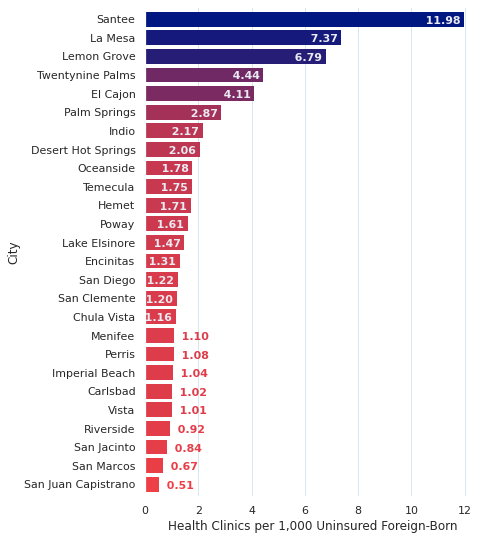

In [87]:
# census_df contains every place in California; filtered by hand for only cities in the area of interest
city_list = ['twentynine palms', 'temecula', 'vista', 'santee', 'san marcos', 'san juan capistrano', 'san jacinto', 'san diego', 'san clemente', 'riverside', 'poway', 'perris', 'palm springs', 'oceanside', 'menifee', 'lemon grove', 'la mesa', 'lake elsinore', 'indio', 'imperial beach', 'hemet', 'encinitas', 'el cajon', 'desert hot springs', 'chula vista', 'carlsbad', ]

data = census_df[census_df['City_Clean'].isin(city_list)]
data = data.sort_values(by='Health Clinics per 1000 Uninsured Foreign-Born') # bars will be in this order
#print(len(data))
data['City_Clean'] = data['City_Clean'].str.title() #capitalize cities

#exporting dataset to use for the QGIS map
data.to_csv(r'/Users/stephaniepeng/Desktop/BIMI_Carl_Jupyter/health_merged_sandiego.csv')

# pick font
plt.rc('text', usetex=False)
plt.rcParams['font.sans-serif']='Freight'
plt.rcParams['font.family'] = 'sans'

# define colors
bimiBlue = '#3d8dae'
mediumBlue = '#b8d6de'
lightBlue = '#d6e8ed'
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('cmap_name', [(255/255,66/255,66/255), (0/255,22/255,128/255)])
color_list = cmap(data['Health Clinics per 1000 Uninsured Foreign-Born']/8) # the color map expects values between 0 and 1. Divide by 4 to make the gradient run from 0 to 4 instead. 

# plot
ax = data.plot(
                kind='barh',
                y='Health Clinics per 1000 Uninsured Foreign-Born',
                x = 'City_Clean',
                color = color_list,
                edgecolor = 'none',
                figsize = (6,9),
                legend=False,
                title = '',
                width = 0.8
                )

# axes
ax.set_xlabel('Health Clinics per 1,000 Uninsured Foreign-Born')
#ax.get_xaxis().set_ticks([]) #hides numbers
ax.set_ylabel('City')

# average line
#ax.axvline(x=10000*98/434883, zorder=0.75, color=bimiBlue)
#ax.text(2.4, 2.5,
#        '\n Bay Area as a Whole \n (2.25 offices per 10,000)',
#        color = bimiBlue,
#       )
#ax.add_patch(matplotlib.patches.Rectangle((0,-1),1.71,28,edgecolor='none',facecolor=lightBlue,zorder=0.74))

# grid background
#ax.set_facecolor(lightBlue)
ax.set_facecolor('none')

# grid lines
#ax.grid(True, axis='both', color=mediumBlue)
ax.grid(True, axis='x', color=lightBlue)
ax.grid(False, axis='y')

#label the bars:
values = data['Health Clinics per 1000 Uninsured Foreign-Born'].values
cuttoff = 9 # this is how many bars should have the value printed after the bar instead of inside the bar
for patch, value in zip(ax.patches[:cuttoff], values[:cuttoff]):
    ax.text(patch.get_x() + patch.get_width(), patch.get_y() + 0.05,
            f' {value: .2f}', 
            ha="left",
            fontweight='bold',
            va='bottom',
            color=patch.get_facecolor(),
            fontsize=11
           )
for patch, value in zip(ax.patches[cuttoff:], values[cuttoff:]):
    ax.text(patch.get_x() + patch.get_width(), patch.get_y() + 0.06,
            f' {value: .2f} ', 
            ha="right",
            fontweight='bold',
            va='bottom',
            color='#eaeaf2',
            fontsize=11
           )

    
plt.savefig("health bars.pdf", bbox_inches='tight')